# DATA LOAD

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/test.csv')

In [ ]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [ ]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# 전처리

In [ ]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## payload 결측치 관련 파생변수

In [ ]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [ ]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [ ]:
test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화 (syn_flag_cat, port_dst_cat)

In [ ]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
# port_dst => 1~2023/이후 상위 5개/나머지
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [ ]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

In [ ]:
dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

In [ ]:
# PSH 유무: tcp_psh_count > 0 → 1, else → 0
train['has_psh_flag'] = (train['tcp_psh_count'] > 0).astype(int)
test['has_psh_flag'] = (test['tcp_psh_count'] > 0).astype(int)

# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

# 패킷 간 평균 시간 간격 이진 파생변수: iat_avg_packets <= 1 → 1, else → 0
train['is_iat_low'] = (train['iat_avg_packets'] <= 1.0).astype(int)
test['is_iat_low'] = (test['iat_avg_packets'] <= 1.0).astype(int)

train.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True) ## 불필요한 기존변수삭제
test.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)

## 변수 삭제

In [ ]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [ ]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio' # 파생변수 포함
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le_protocol = LabelEncoder()
le_postdst = LabelEncoder()
le_attack = LabelEncoder()

le_protocol.fit(pd.concat([train['protocol'], test['protocol']], axis=0).astype(str).unique())
le_postdst.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())

train['protocol'] = le_protocol.transform(train['protocol'].astype(str))
train['port_dst_cat'] = le_postdst.transform(train['port_dst_cat'].astype(str))
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

test['protocol'] = le_protocol.transform(test['protocol'].astype(str))
test['port_dst_cat'] = le_postdst.transform(test['port_dst_cat'].astype(str))

# 모델 선정 + 학습 및 예측

#**LGBM**

###**Gradient Boosting 기반 LightGBM - train-test 분리 없음**

**필요 패키지 로딩**

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

**타겟, 피처 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

**SMOTE 적용**

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

**교차검증 예측**

In [ ]:
lgbm_model = lgb.LGBMClassifier(objective='multiclass',
                                num_class=len(np.unique(y)),
                                random_state=156,
                                n_estimators=100,
                                learning_rate=0.1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=156)
cv_pred = cross_val_predict(lgbm_model, X_resampled, y_resampled, cv=cv)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 84393, number of used features: 16
[LightGBM] [Info] Start training from score -2.485013
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.485013
[LightGBM] [Info] Start training from score -2.485013
[LightGBM] [Info] Start training from score -2.484871
[LightGBM] [Info] Start training from score -2.484871

**Macro F1 Score 성능평가**

In [ ]:
print(classification_report(y_resampled, cv_pred, digits=4))
print("Macro F1 Score:", f1_score(y_resampled, cv_pred, average='macro'))

              precision    recall  f1-score   support

           0     0.9964    0.9877    0.9921      8791
           1     0.9999    1.0000    0.9999      8791
           2     0.9997    0.9997    0.9997      8791
           3     0.9798    0.9997    0.9896      8791
           4     0.9987    0.9826    0.9906      8791
           5     0.9940    0.9982    0.9961      8791
           6     0.9998    0.9982    0.9990      8791
           7     0.9998    0.9999    0.9998      8791
           8     0.9990    0.9992    0.9991      8791
           9     0.9992    0.9997    0.9994      8791
          10     0.9943    0.9987    0.9965      8791
          11     0.9987    0.9954    0.9971      8791

    accuracy                         0.9966    105492
   macro avg     0.9966    0.9966    0.9966    105492
weighted avg     0.9966    0.9966    0.9966    105492

Macro F1 Score: 0.9965783330773591


**전체 데이터 재학습**

In [ ]:
lgbm_model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 105492, number of used features: 16
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.48490

LGBMClassifier(num_class=12, objective='multiclass', random_state=156)

**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = lgbm_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_lgbm_no.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_lgbm_no.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

- gain 기준으로 수행하여 피처가 모델에서 성능개선에 기여한 정도로 나열함
- LGBM에서 중요도를 확인할 땐 booster_ 객체를 통해 접근해야 하는 것을 확인 후 진행

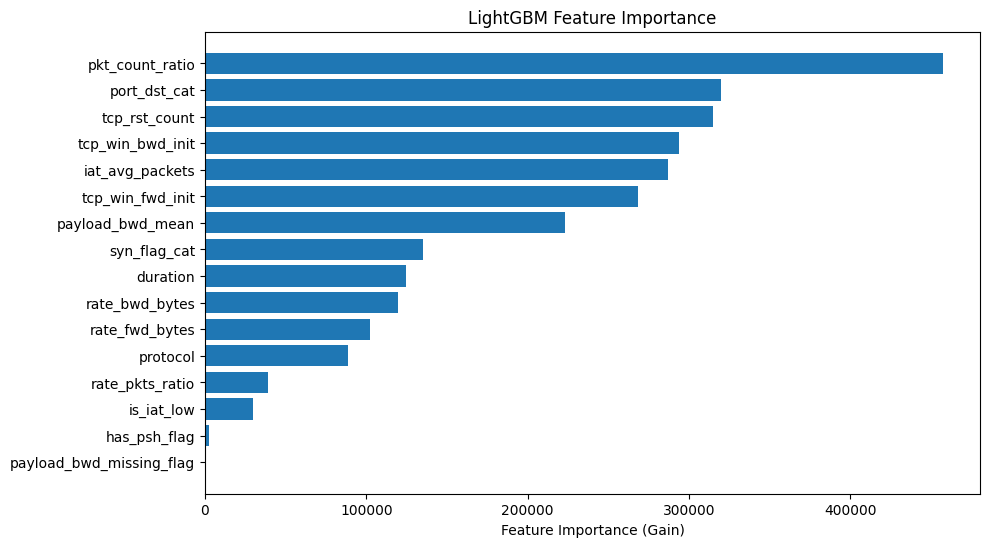

In [ ]:
importance = lgbm_model.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_model.booster_.feature_name()

sorted_idx = importance.argsort()[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (Gain)')
plt.title('LightGBM Feature Importance')
plt.show()

###**Gradient Boosting 기반 LightGBM - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
# 타겟 및 피처 나누기
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

# 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=156, stratify=y)

**SMOTE 적용**
- 클래스 불균형 해소를 위한 전처리

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**각 클래스 별 가중치 부여방식 설정**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, weights))

In [ ]:
# LightGBM에 가중치 부여방식 적용
lgbm_clf = lgb.LGBMClassifier(class_weight=class_weight_dict, random_state=156)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2259
[LightGBM] [Info] Number of data points in the train set: 9599, number of used features: 16
[LightGBM] [Info] Start training from score -2.487750
[LightGBM] [Info] Start training from score -2.469430
[LightGBM] [Info] Start training from score -2.487248
[LightGBM] [Info] Start training from score -2.503865
[LightGBM] [Info] Start training from score -2.481700
[LightGBM] [Info] Start training from score -2.487924
[LightGBM] [Info] Start training from score -2.488409
[LightGBM] [Info] Start training from score -2.487779
[LightGBM] [Info] Start training from score -2.495159
[LightGBM] [Info] Start training from score -2.478209
[LightGBM] [Info] Start training from score -2.505797
[LightGBM] [Info] Start training from score -2.446957
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(class_weight={np.int64(0): np.float64(0.11374322223486141),
                             np.int64(1): np.float64(37.03395061728395),
                             np.int64(2): np.float64(2.122965322009908),
                             np.int64(3): np.float64(21.27482269503546),
                             np.int64(4): np.float64(24.38821138211382),
                             np.int64(5): np.float64(0.5816850882295909),
                             np.int64(6): np.float64(1.260928961748634),
                             np.int64(7): np.float64(33.330555555555556),
                             np.int64(8): np.float64(29.409313725490197),
                             np.int64(9): np.float64(38.458333333333336),
                             np.int64(10): np.float64(71.42261904761905),
                             np.int64(11): np.float64(166.65277777777777)},
               random_state=156)

In [ ]:
# 예측 및 성능 평가
y_pred = lgbm_clf.predict(X_val)
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1758
           1       1.00      0.80      0.89         5
           2       1.00      0.99      0.99        94
           3       0.58      0.70      0.64        10
           4       0.70      0.88      0.78         8
           5       0.97      0.99      0.98       344
           6       0.99      0.99      0.99       159
           7       1.00      1.00      1.00         6
           8       0.75      0.43      0.55         7
           9       1.00      0.60      0.75         5
          10       0.67      0.67      0.67         3
          11       0.50      1.00      0.67         1

    accuracy                           0.99      2400
   macro avg       0.85      0.84      0.82      2400
weighted avg       0.99      0.99      0.99      2400

Macro F1 Score: 0.8241940970598775


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = lgbm_clf.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_lgbm_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_lgbm_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 리더보드 점수: 0.76231

**Feature Importance 시각화**

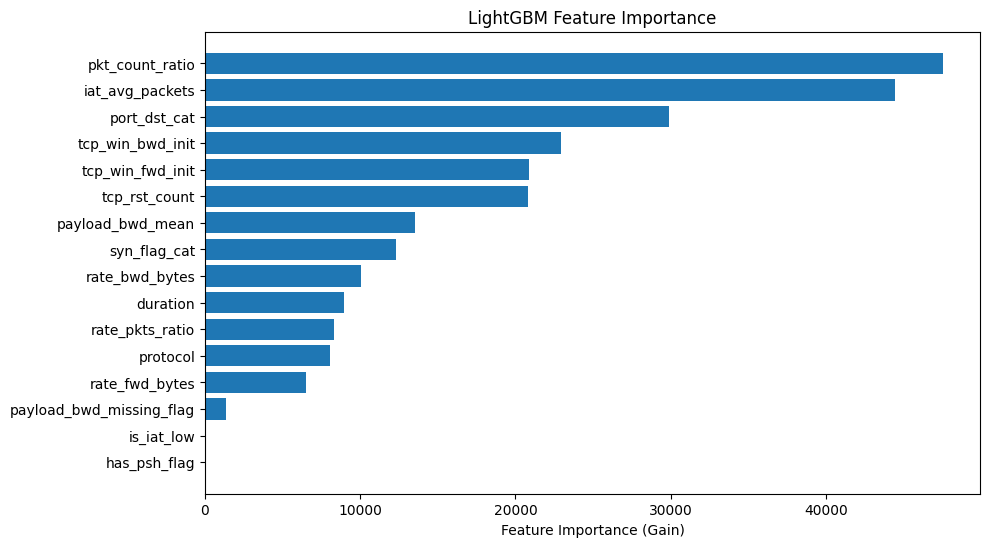

In [ ]:
importance = lgbm_clf.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_clf.booster_.feature_name()

sorted_idx = importance.argsort()[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (Gain)')
plt.title('LightGBM Feature Importance')
plt.show()

###**Gradient Boosting 기반 LightGBM - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
# 타겟 및 피처 나누기
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

# 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.3, random_state=156, stratify=y)

**SMOTE 적용**
- 클래스 불균형 해소를 위한 전처리

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)

**각 클래스 별 가중치 부여방식 설정**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, weights))

In [ ]:
lgbm_clfr = lgb.LGBMClassifier(class_weight=class_weight_dict, random_state=156)
lgbm_clfr.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2248
[LightGBM] [Info] Number of data points in the train set: 8399, number of used features: 16
[LightGBM] [Info] Start training from score -2.484133
[LightGBM] [Info] Start training from score -2.478742
[LightGBM] [Info] Start training from score -2.483110
[LightGBM] [Info] Start training from score -2.480984
[LightGBM] [Info] Start training from score -2.473620
[LightGBM] [Info] Start training from score -2.484268
[LightGBM] [Info] Start training from score -2.484199
[LightGBM] [Info] Start training from score -2.484019
[LightGBM] [Info] Start training from score -2.475651
[LightGBM] [Info] Start training from score -2.495069
[LightGBM] [Info] Start training from score -2.463816
[LightGBM] [Info] Start training from score -2.532809


LGBMClassifier(class_weight={np.int64(0): np.float64(0.11374322223486141),
                             np.int64(1): np.float64(37.03395061728395),
                             np.int64(2): np.float64(2.122965322009908),
                             np.int64(3): np.float64(21.27482269503546),
                             np.int64(4): np.float64(24.38821138211382),
                             np.int64(5): np.float64(0.5816850882295909),
                             np.int64(6): np.float64(1.260928961748634),
                             np.int64(7): np.float64(33.330555555555556),
                             np.int64(8): np.float64(29.409313725490197),
                             np.int64(9): np.float64(38.458333333333336),
                             np.int64(10): np.float64(71.42261904761905),
                             np.int64(11): np.float64(166.65277777777777)},
               random_state=156)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = lgbm_clfr.predict(X_val)
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2638
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       141
           3       0.59      0.93      0.72        14
           4       0.64      0.58      0.61        12
           5       0.97      0.99      0.98       516
           6       0.99      0.99      0.99       238
           7       1.00      1.00      1.00         9
           8       0.67      0.40      0.50        10
           9       1.00      0.62      0.77         8
          10       0.50      0.75      0.60         4
          11       0.33      0.50      0.40         2

    accuracy                           0.98      3600
   macro avg       0.81      0.81      0.80      3600
weighted avg       0.99      0.98      0.98      3600

Macro F1 Score: 0.7963044310527178


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = lgbm_clfr.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_lgbm_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_lgbm_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 리더보드 점수: 0.76231

**Feature Importance 시각화**

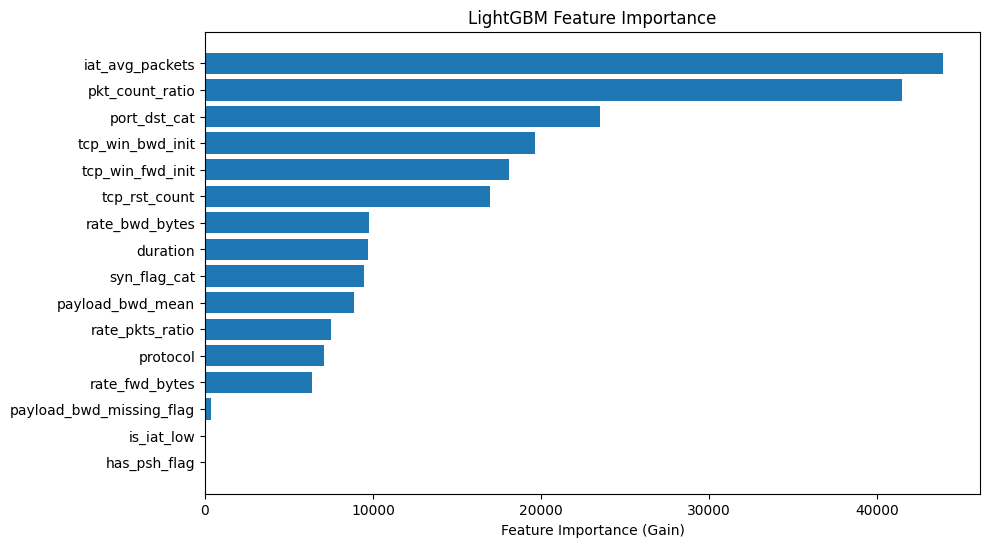

In [ ]:
importance = lgbm_clfr.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_clfr.booster_.feature_name()

sorted_idx = importance.argsort()[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (Gain)')
plt.title('LightGBM Feature Importance')
plt.show()

#**RF**

##**RandomForest - train-test 분리 없음**

**필요 패키지 로딩**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, make_scorer
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
# 타겟 및 피처 나누기
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

# 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.3, random_state=156, stratify=y)

**SMOTE 적용**

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 정의 및 교차검증 예측**

In [ ]:
rf_model = RandomForestClassifier(
    random_state=156,
    n_estimators=100,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=156)
cv_pred = cross_val_predict(rf_model, X_resampled, y_resampled, cv=cv)

**Macro F1 Score 성능평가**

In [ ]:
print(classification_report(y_resampled, cv_pred, digits=4))
print("Macro F1 Score:", f1_score(y_resampled, cv_pred, average='macro'))

              precision    recall  f1-score   support

           0     0.9959    0.9891    0.9925      8791
           1     1.0000    1.0000    1.0000      8791
           2     0.9999    1.0000    0.9999      8791
           3     0.9801    0.9997    0.9898      8791
           4     0.9993    0.9824    0.9908      8791
           5     0.9949    0.9975    0.9962      8791
           6     0.9995    0.9989    0.9992      8791
           7     0.9999    0.9999    0.9999      8791
           8     0.9983    0.9989    0.9986      8791
           9     0.9986    0.9993    0.9990      8791
          10     0.9962    0.9965    0.9964      8791
          11     0.9964    0.9967    0.9965      8791

    accuracy                         0.9966    105492
   macro avg     0.9966    0.9966    0.9966    105492
weighted avg     0.9966    0.9966    0.9966    105492

Macro F1 Score: 0.9965593100689748


**전체 데이터 재학습**

In [ ]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_jobs=-1, random_state=156)

**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = rf_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_rf_no.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_rf_no.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

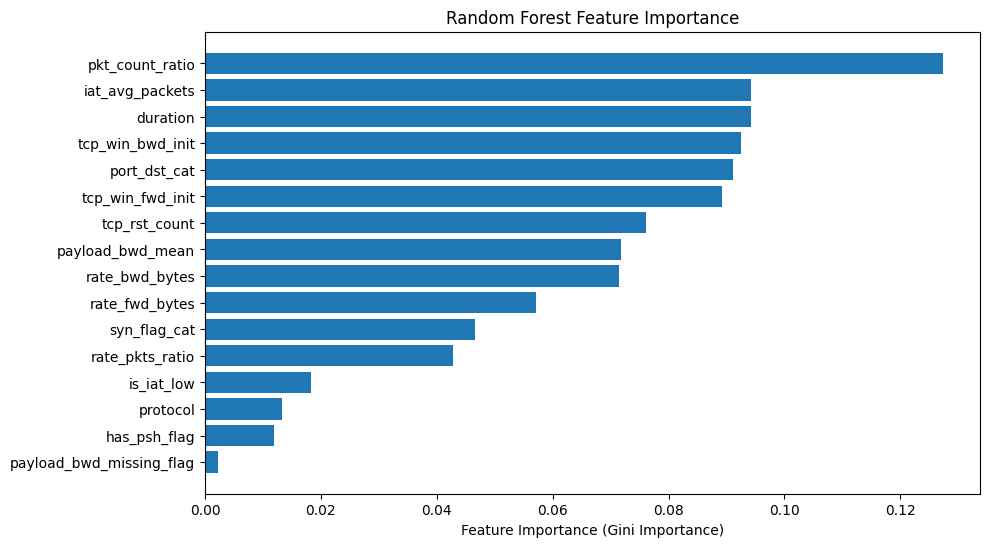

In [ ]:
importance = rf_model.feature_importances_
feature_names = X.columns

sorted_idx = importance.argsort()[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (Gini Importance)')
plt.title('Random Forest Feature Importance')
plt.show()

##**Random Forest - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

**SMOTE 적용**

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)

**RandomForest 학습**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=156, class_weight='balanced', n_jobs=-1)

rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=156)

**검증 데이터에 대한 예측**

In [ ]:
y_pred = rf_clf.predict(X_val)

**Macro F1 Score 성능평가**

In [ ]:
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9892    0.9898    0.9895      1758
           1     1.0000    0.8000    0.8889         5
           2     1.0000    1.0000    1.0000        94
           3     0.5833    0.7000    0.6364        10
           4     0.8333    0.6250    0.7143         8
           5     0.9740    0.9797    0.9768       344
           6     0.9875    0.9937    0.9906       159
           7     0.8571    1.0000    0.9231         6
           8     0.6000    0.4286    0.5000         7
           9     1.0000    0.4000    0.5714         5
          10     0.5000    0.6667    0.5714         3
          11     0.0000    0.0000    0.0000         1

    accuracy                         0.9825      2400
   macro avg     0.7770    0.7153    0.7302      2400
weighted avg     0.9827    0.9825    0.9822      2400

Macro F1 Score: 0.7302


**Feature Importance 시각화**

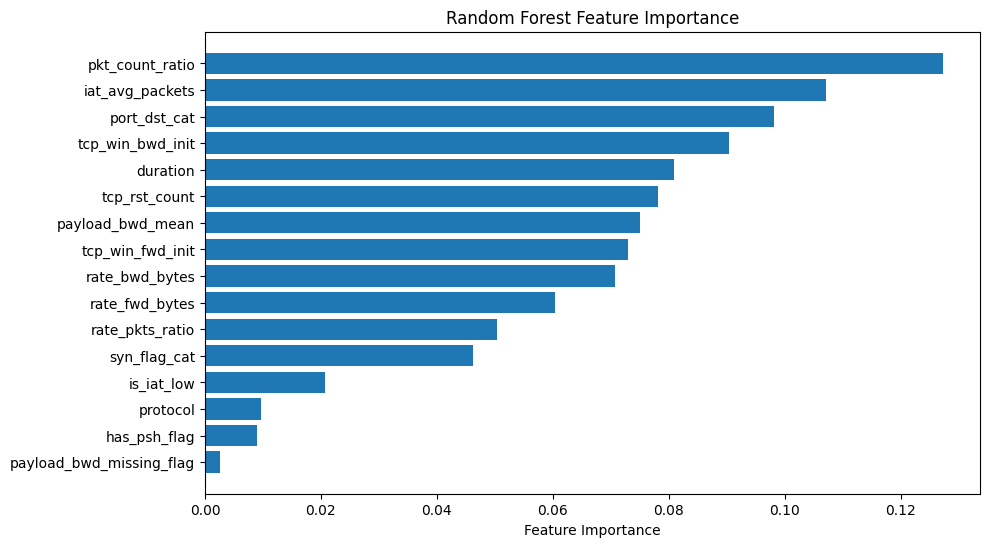

In [ ]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importances)[::-1]
sorted_importance = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = rf_clf.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/open/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_rf_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_rf_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 리더보드 점수: 0.6984

##**Random Forest - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=156, stratify=y)

**SMOTE 적용**

In [ ]:
smote = SMOTE(random_state=156, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**RandomForest 학습**

In [ ]:
rf_clfr = RandomForestClassifier(n_estimators=100, random_state=156, class_weight='balanced', n_jobs=-1)

rf_clfr.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=156)

**검증 데이터에 대한 예측**

In [ ]:
y_pred = rf_clfr.predict(X_val)

**Macro F1 Score 성능평가**

In [ ]:
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9909    0.9871    0.9890      2638
           1     1.0000    1.0000    1.0000         8
           2     1.0000    1.0000    1.0000       141
           3     0.6087    1.0000    0.7568        14
           4     1.0000    0.4167    0.5882        12
           5     0.9639    0.9826    0.9731       516
           6     0.9958    0.9958    0.9958       238
           7     0.9000    1.0000    0.9474         9
           8     0.5000    0.4000    0.4444        10
           9     1.0000    0.6250    0.7692         8
          10     0.3333    0.5000    0.4000         4
          11     0.0000    0.0000    0.0000         2

    accuracy                         0.9822      3600
   macro avg     0.7744    0.7423    0.7387      3600
weighted avg     0.9834    0.9822    0.9821      3600

Macro F1 Score: 0.7387


**Feature Importance 시각화**

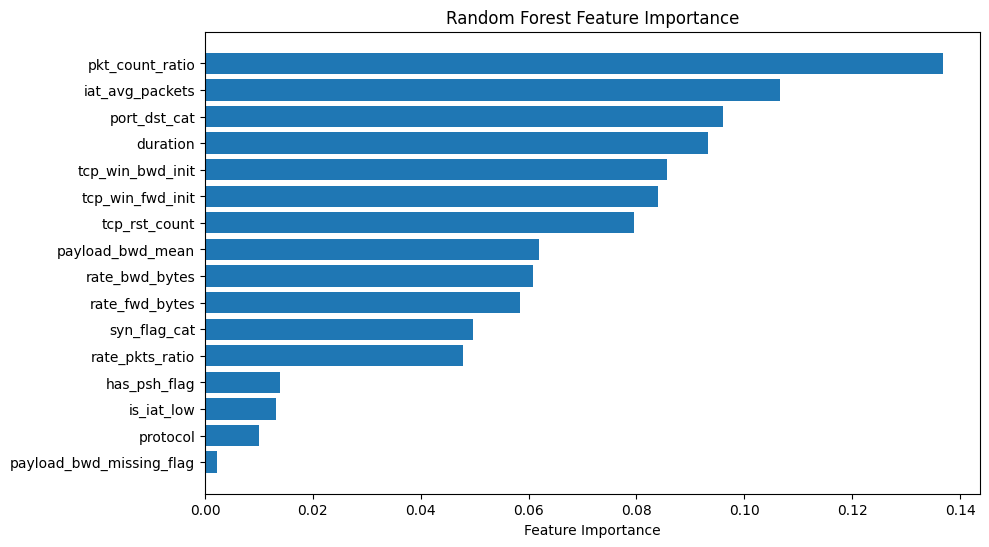

In [ ]:
importances = rf_clfr.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(importances)[::-1]
sorted_importance = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = rf_clfr.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/open/sample_submission.csv')

NameError: name 'pd' is not defined

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_rf_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_rf_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**XGB**

###**XGBoost - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=156
)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**클래스 별 가중치 계산**

In [ ]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, weights))

**모델 학습**

In [ ]:
xgb_clf = XGBClassifier(random_state=156, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = xgb_clf.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1758
           1       1.00      0.80      0.89         5
           2       1.00      0.99      0.99        94
           3       0.47      0.70      0.56        10
           4       0.75      0.75      0.75         8
           5       0.98      0.99      0.99       344
           6       0.98      0.99      0.98       159
           7       0.60      1.00      0.75         6
           8       0.60      0.43      0.50         7
           9       1.00      0.40      0.57         5
          10       0.29      0.67      0.40         3
          11       0.00      0.00      0.00         1

    accuracy                           0.98      2400
   macro avg       0.72      0.73      0.70      2400
weighted avg       0.98      0.98      0.98      2400

Macro F1 Score: 0.6976035196505469


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = xgb_clf.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_xgb_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_xgb_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

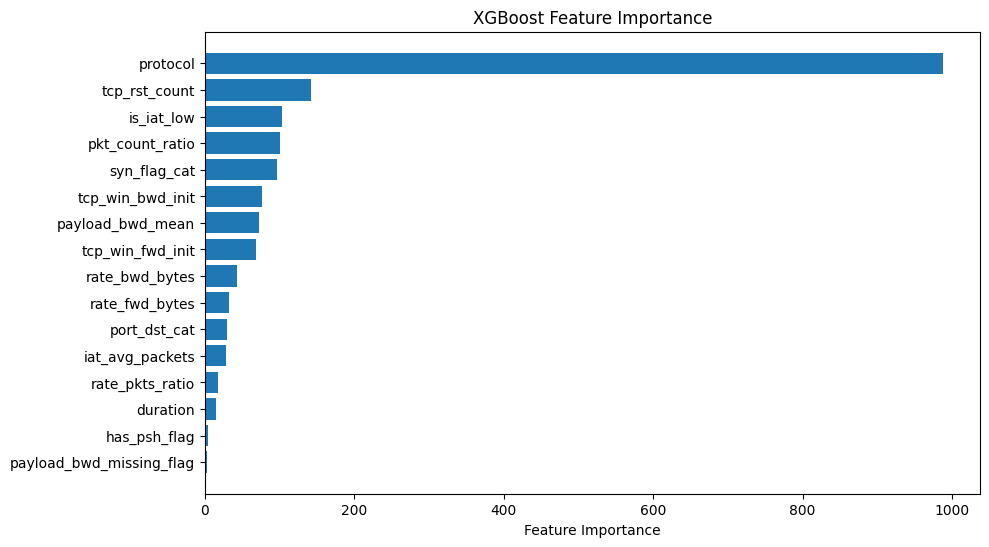

In [ ]:
importance = xgb_clf.get_booster().get_score(importance_type='gain')
feature_names = list(importance.keys())
importances = list(importance.values())

sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = [importances[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

###**XGBoost - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=156
)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**클래스 별 가중치 계산**

In [ ]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, weights))

**모델 학습**

In [ ]:
xgb_clfr = XGBClassifier(random_state=156, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')
xgb_clfr.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = xgb_clfr.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2638
           1       1.00      0.88      0.93         8
           2       0.99      0.99      0.99       141
           3       0.57      0.86      0.69        14
           4       0.75      0.75      0.75        12
           5       0.97      0.98      0.98       516
           6       0.99      0.99      0.99       238
           7       0.80      0.89      0.84         9
           8       0.62      0.50      0.56        10
           9       0.71      0.62      0.67         8
          10       0.25      0.75      0.38         4
          11       0.00      0.00      0.00         2

    accuracy                           0.98      3600
   macro avg       0.72      0.77      0.73      3600
weighted avg       0.98      0.98      0.98      3600

Macro F1 Score: 0.7295627198264532


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = xgb_clfr.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_xgb_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_xgb_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

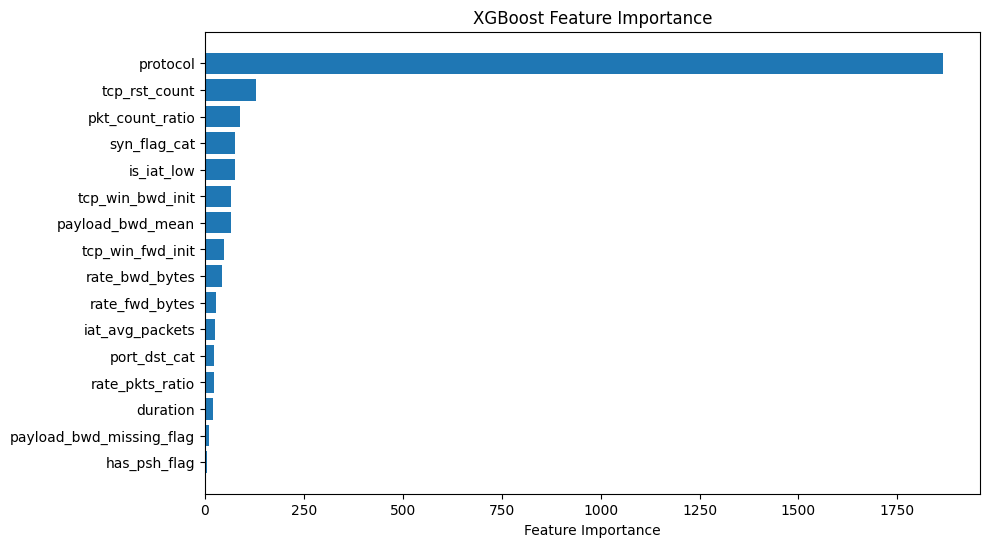

In [ ]:
importance = xgb_clfr.get_booster().get_score(importance_type='gain')
feature_names = list(importance.keys())
importances = list(importance.values())

sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = [importances[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

#**CAT**

###**CatBoost - test_size = 0.2**

In [ ]:
!pip install catboost

**필요 패키지 로딩**

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop('attack_type', axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=156
    )

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**

In [ ]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=156
)

cat_model.fit(X_train_smote, y_train_smote)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = cat_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1758
           1       1.00      0.80      0.89         5
           2       0.99      1.00      0.99        94
           3       0.42      0.80      0.55        10
           4       0.58      0.88      0.70         8
           5       0.96      0.98      0.97       344
           6       0.97      0.99      0.98       159
           7       0.86      1.00      0.92         6
           8       0.30      0.43      0.35         7
           9       0.67      0.40      0.50         5
          10       0.30      1.00      0.46         3
          11       0.00      0.00      0.00         1

    accuracy                           0.97      2400
   macro avg       0.67      0.77      0.69      2400
weighted avg       0.98      0.97      0.98      2400

Macro F1 Score: 0.6924311157238273


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = cat_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
if len(test_pred.shape) > 1:
    test_pred = test_pred.ravel()

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_cat_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_cat_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

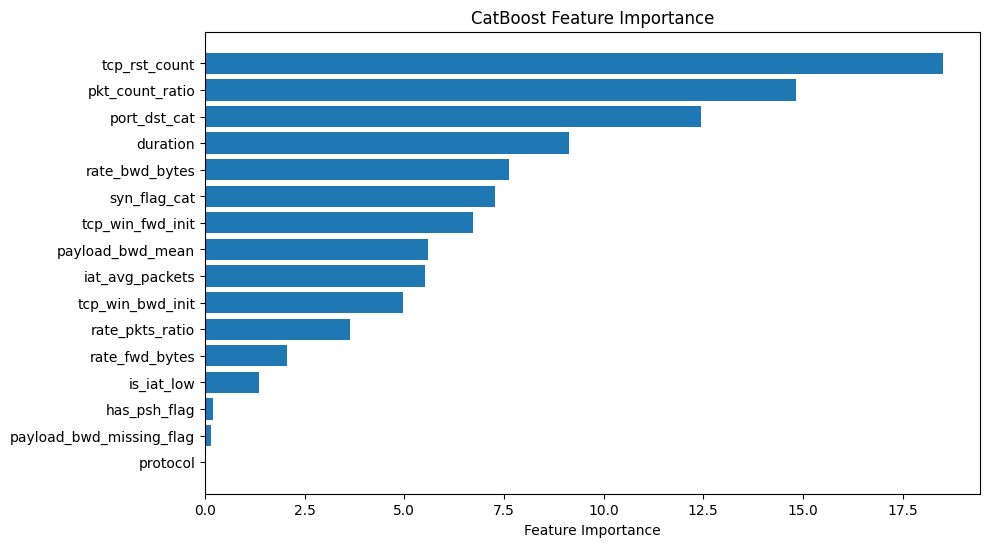

In [ ]:
importance = cat_model.get_feature_importance(type='FeatureImportance')
feature_names = X.columns

sorted_idx = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()

###**CatBoost - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop('attack_type', axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=156
    )

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**

In [ ]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=156
)

cat_model.fit(X_train_smote, y_train_smote)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = cat_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2638
           1       1.00      0.88      0.93         8
           2       0.98      1.00      0.99       141
           3       0.46      0.93      0.62        14
           4       0.56      0.75      0.64        12
           5       0.95      0.98      0.97       516
           6       0.97      0.99      0.98       238
           7       0.75      1.00      0.86         9
           8       0.44      0.40      0.42        10
           9       0.71      0.62      0.67         8
          10       0.29      1.00      0.44         4
          11       0.00      0.00      0.00         2

    accuracy                           0.97      3600
   macro avg       0.68      0.79      0.71      3600
weighted avg       0.98      0.97      0.98      3600

Macro F1 Score: 0.7088775809247853


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = cat_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
if len(test_pred.shape) > 1:
    test_pred = test_pred.ravel()

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_cat_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_cat_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

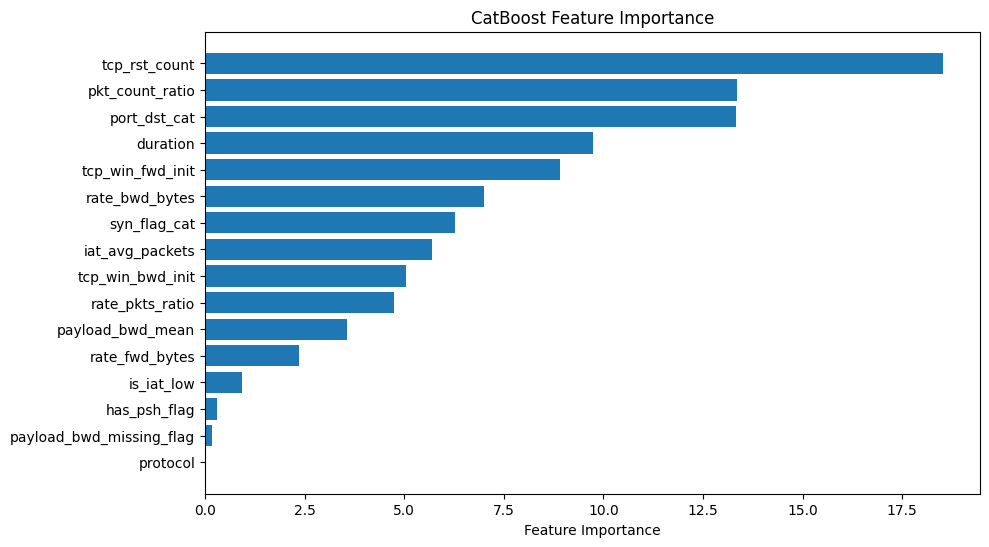

In [ ]:
importance = cat_model.get_feature_importance(type='FeatureImportance')
feature_names = X.columns

sorted_idx = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()